In [2]:
%reset -f
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 8)
plt.rcParams['figure.figsize'] = (9, 6)

# Create a [DataFrame](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe)

In [3]:
dates = pd.date_range('20130101', periods=6)
pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

,A,B,C,D
2013-01-01,0.195083,0.009906,0.614078,-0.050926
2013-01-02,0.096372,0.260020,-0.502610,0.896723
2013-01-03,0.257331,-0.518171,2.389487,-0.856609
2013-01-04,1.606749,1.221796,-0.100956,0.097240
2013-01-05,-0.061968,0.921602,0.939754,-0.025405
2013-01-06,-1.016095,-0.143385,-0.785586,-1.120128


In [4]:
pd.DataFrame({'A' : 1.,
              'B' : pd.Timestamp('20130102'),
              'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
              'D' : np.arange(4,dtype='int32'),
              'E' : pd.Categorical(["test","train","test","train"]),
              'F' : 'foo' })


,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,0,test,foo
1,1.0,2013-01-02,1.0,1,train,foo
2,1.0,2013-01-02,1.0,2,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


# Load Data from CSV File

In [5]:
url = "https://www.fun-mooc.fr/c4x/agrocampusouest/40001S03/asset/AnaDo_JeuDonnees_TemperatFrance.csv"
french_cities = pd.read_csv(url, delimiter=";", encoding="latin1", index_col=0)
french_cities

,Janv,Févr,Mars,Avri,Mai,Juin,juil,Août,Sept,Octo,Nove,Déce,Lati,Long,Moye,Ampl,Région
Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.50,-0.34,13.33,15.4,SO
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,10.77,10.2,NO
Clermont,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,45.47,3.05,10.94,16.8,SE
Grenoble,1.5,3.2,7.7,10.6,14.5,17.8,20.1,19.5,16.7,11.4,6.5,2.3,45.10,5.43,10.98,18.6,SE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rennes,4.8,5.3,7.9,10.1,13.1,16.2,17.9,17.8,15.7,11.6,7.8,5.4,48.05,-1.41,11.13,13.1,NO
Strasbourg,0.4,1.5,5.6,9.8,14.0,17.2,19.0,18.3,15.1,9.5,4.9,1.3,48.35,7.45,9.72,18.6,NE
Toulouse,4.7,5.6,9.2,11.6,14.9,18.7,20.9,20.9,18.3,13.3,8.6,5.5,43.36,1.26,12.68,16.2,SO
Vichy,2.4,3.4,7.1,9.9,13.6,17.1,19.3,18.8,16.0,11.0,6.6,3.4,46.08,3.26,10.72,16.9,SE


# Viewing Data

In [6]:
french_cities.head()

,Janv,Févr,Mars,Avri,Mai,Juin,juil,Août,Sept,Octo,Nove,Déce,Lati,Long,Moye,Ampl,Région
Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.50,-0.34,13.33,15.4,SO
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,10.77,10.2,NO
Clermont,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,45.47,3.05,10.94,16.8,SE
Grenoble,1.5,3.2,7.7,10.6,14.5,17.8,20.1,19.5,16.7,11.4,6.5,2.3,45.10,5.43,10.98,18.6,SE
Lille,2.4,2.9,6.0,8.9,12.4,15.3,17.1,17.1,14.7,10.4,6.1,3.5,50.38,3.04,9.73,14.7,NE


In [7]:
french_cities.tail()

,Janv,Févr,Mars,Avri,Mai,Juin,juil,Août,Sept,Octo,Nove,Déce,Lati,Long,Moye,Ampl,Région
Paris,3.4,4.1,7.6,10.7,14.3,17.5,19.1,18.7,16.0,11.4,7.1,4.3,48.52,2.20,11.18,15.7,NE
Rennes,4.8,5.3,7.9,10.1,13.1,16.2,17.9,17.8,15.7,11.6,7.8,5.4,48.05,-1.41,11.13,13.1,NO
Strasbourg,0.4,1.5,5.6,9.8,14.0,17.2,19.0,18.3,15.1,9.5,4.9,1.3,48.35,7.45,9.72,18.6,NE
Toulouse,4.7,5.6,9.2,11.6,14.9,18.7,20.9,20.9,18.3,13.3,8.6,5.5,43.36,1.26,12.68,16.2,SO
Vichy,2.4,3.4,7.1,9.9,13.6,17.1,19.3,18.8,16.0,11.0,6.6,3.4,46.08,3.26,10.72,16.9,SE


# Index

In [8]:
french_cities.index

Index(['Bordeaux', 'Brest', 'Clermont', 'Grenoble', 'Lille', 'Lyon',
       'Marseille', 'Montpellier', 'Nantes', 'Nice', 'Paris', 'Rennes',
       'Strasbourg', 'Toulouse', 'Vichy'],
      dtype='object')

We can rename an index by setting its name.

In [9]:
french_cities.index.name = "City"
french_cities.head()

,Janv,Févr,Mars,Avri,Mai,Juin,juil,Août,Sept,Octo,Nove,Déce,Lati,Long,Moye,Ampl,Région
City,,,,,,,,,,,,,,,,,
Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.50,-0.34,13.33,15.4,SO
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,10.77,10.2,NO
Clermont,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,45.47,3.05,10.94,16.8,SE
Grenoble,1.5,3.2,7.7,10.6,14.5,17.8,20.1,19.5,16.7,11.4,6.5,2.3,45.10,5.43,10.98,18.6,SE
Lille,2.4,2.9,6.0,8.9,12.4,15.3,17.1,17.1,14.7,10.4,6.1,3.5,50.38,3.04,9.73,14.7,NE


# Exercise 
## Rename DataFrame Months in English

In [10]:
import locale
import calendar

locale.setlocale(locale.LC_ALL,'en_US')

months = calendar.month_abbr
print(*months)

 Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec


In [11]:
french_cities.rename(
  columns={ old : new 
           for old, new in zip(french_cities.columns[:12], months[1:])
          if old != new },
  inplace=True)
french_cities.columns

Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec', 'Lati', 'Long', 'Moye', 'Ampl', 'Région'],
      dtype='object')

In [12]:
french_cities.rename(columns={'Moye':'Mean'}, inplace=True)

In [13]:
french_cities

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Lati,Long,Mean,Ampl,Région
City,,,,,,,,,,,,,,,,,
Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.50,-0.34,13.33,15.4,SO
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,10.77,10.2,NO
Clermont,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,45.47,3.05,10.94,16.8,SE
Grenoble,1.5,3.2,7.7,10.6,14.5,17.8,20.1,19.5,16.7,11.4,6.5,2.3,45.10,5.43,10.98,18.6,SE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rennes,4.8,5.3,7.9,10.1,13.1,16.2,17.9,17.8,15.7,11.6,7.8,5.4,48.05,-1.41,11.13,13.1,NO
Strasbourg,0.4,1.5,5.6,9.8,14.0,17.2,19.0,18.3,15.1,9.5,4.9,1.3,48.35,7.45,9.72,18.6,NE
Toulouse,4.7,5.6,9.2,11.6,14.9,18.7,20.9,20.9,18.3,13.3,8.6,5.5,43.36,1.26,12.68,16.2,SO
Vichy,2.4,3.4,7.1,9.9,13.6,17.1,19.3,18.8,16.0,11.0,6.6,3.4,46.08,3.26,10.72,16.9,SE


# From a local or remote HTML file
We can download and extract data about mean sea level stations around the world from the [PSMSL website](http://www.psmsl.org/).

In [14]:
# Needs `lxml`, `beautifulSoup4` and `html5lib` python packages
table_list = pd.read_html("http://www.psmsl.org/data/obtaining/")

In [15]:
# there is 1 table on that page which contains metadata about the stations where 
# sea levels are recorded
local_sea_level_stations = table_list[0]
local_sea_level_stations

,Station Name,ID,Lat.,Lon.,GLOSS ID,Country,Date,Coastline,Station
0,HELIGMAN,231,60.200,19.300,NaN,ALA,01/01/1980,60,251
1,KOBBAKLINTAR,63,60.033,19.883,NaN,ALA,01/01/1980,60,261
2,LEMSTROM,84,60.100,20.017,NaN,ALA,01/01/1980,60,271
3,FOGLO / DEGERBY,249,60.032,20.385,NaN,ALA,20/12/2017,60,281
...,...,...,...,...,...,...,...,...,...
1505,"LIME TREE BAY, ST CROIX",1447,17.693,-64.753,NaN,VIR,02/02/2017,939,11
1506,CHRISTIANSTED HARBOUR,2118,17.750,-64.705,NaN,VIR,02/02/2017,939,15
1507,LAMESHUR BAY,2119,18.317,-64.723,NaN,VIR,02/02/2017,939,21
1508,ADEN,44,12.788,44.974,3.0,YEM,01/02/2016,485,1


# Indexing on DataFrames

In [16]:
french_cities['Lati']  # DF [] accesses columns (Series)

City
Bordeaux      44.50
Brest         48.24
Clermont      45.47
Grenoble      45.10
              ...  
Rennes        48.05
Strasbourg    48.35
Toulouse      43.36
Vichy         46.08
Name: Lati, Length: 15, dtype: float64

`.loc` and `.iloc` allow to access individual values, slices or masked selections:

In [17]:
french_cities.loc['Rennes', "Sep"]

15.7

In [18]:
french_cities.loc['Rennes', ["Sep", "Dec"]]

Sep    15.7
Dec     5.4
Name: Rennes, dtype: object

In [19]:
french_cities.loc['Rennes', "Sep":"Dec"]

Sep    15.7
Oct    11.6
Nov     7.8
Dec     5.4
Name: Rennes, dtype: object

# Masking

In [20]:
mask = [True, False] * 6
print(french_cities.iloc[0, mask])
print(french_cities.loc["Rennes", mask])

Jan     5.6
Mar    10.3
May    15.8
Jul    20.9
Sep    18.6
Nov     9.1
Name: Bordeaux, dtype: object
Jan     4.8
Mar     7.9
May    13.1
Jul    17.9
Sep    15.7
Nov     7.8
Name: Rennes, dtype: object


# New column


In [21]:
french_cities["std"] = french_cities.iloc[:,:12].std(axis=1)
french_cities

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Lati,Long,Mean,Ampl,Région,std
City,,,,,,,,,,,,,,,,,,
Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.50,-0.34,13.33,15.4,SO,5.792681
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,10.77,10.2,NO,3.773673
Clermont,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,45.47,3.05,10.94,16.8,SE,6.189795
Grenoble,1.5,3.2,7.7,10.6,14.5,17.8,20.1,19.5,16.7,11.4,6.5,2.3,45.10,5.43,10.98,18.6,SE,6.770771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rennes,4.8,5.3,7.9,10.1,13.1,16.2,17.9,17.8,15.7,11.6,7.8,5.4,48.05,-1.41,11.13,13.1,NO,4.958800
Strasbourg,0.4,1.5,5.6,9.8,14.0,17.2,19.0,18.3,15.1,9.5,4.9,1.3,48.35,7.45,9.72,18.6,NE,6.931723
Toulouse,4.7,5.6,9.2,11.6,14.9,18.7,20.9,20.9,18.3,13.3,8.6,5.5,43.36,1.26,12.68,16.2,SO,6.056977
Vichy,2.4,3.4,7.1,9.9,13.6,17.1,19.3,18.8,16.0,11.0,6.6,3.4,46.08,3.26,10.72,16.9,SE,6.201148


In [22]:
french_cities = french_cities.drop("std", axis=1) # remove this new column

In [23]:
french_cities

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Lati,Long,Mean,Ampl,Région
City,,,,,,,,,,,,,,,,,
Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.50,-0.34,13.33,15.4,SO
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,10.77,10.2,NO
Clermont,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,45.47,3.05,10.94,16.8,SE
Grenoble,1.5,3.2,7.7,10.6,14.5,17.8,20.1,19.5,16.7,11.4,6.5,2.3,45.10,5.43,10.98,18.6,SE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rennes,4.8,5.3,7.9,10.1,13.1,16.2,17.9,17.8,15.7,11.6,7.8,5.4,48.05,-1.41,11.13,13.1,NO
Strasbourg,0.4,1.5,5.6,9.8,14.0,17.2,19.0,18.3,15.1,9.5,4.9,1.3,48.35,7.45,9.72,18.6,NE
Toulouse,4.7,5.6,9.2,11.6,14.9,18.7,20.9,20.9,18.3,13.3,8.6,5.5,43.36,1.26,12.68,16.2,SO
Vichy,2.4,3.4,7.1,9.9,13.6,17.1,19.3,18.8,16.0,11.0,6.6,3.4,46.08,3.26,10.72,16.9,SE


# Modifying a dataframe with multiple indexing

In [24]:
# french_cities['Rennes']['Sep'] = 25 # It does not works and breaks the DataFrame
french_cities.loc['Rennes']['Sep'] # = 25 is the right way to do it

15.7

In [25]:
french_cities

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Lati,Long,Mean,Ampl,Région
City,,,,,,,,,,,,,,,,,
Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.50,-0.34,13.33,15.4,SO
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,10.77,10.2,NO
Clermont,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,45.47,3.05,10.94,16.8,SE
Grenoble,1.5,3.2,7.7,10.6,14.5,17.8,20.1,19.5,16.7,11.4,6.5,2.3,45.10,5.43,10.98,18.6,SE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rennes,4.8,5.3,7.9,10.1,13.1,16.2,17.9,17.8,15.7,11.6,7.8,5.4,48.05,-1.41,11.13,13.1,NO
Strasbourg,0.4,1.5,5.6,9.8,14.0,17.2,19.0,18.3,15.1,9.5,4.9,1.3,48.35,7.45,9.72,18.6,NE
Toulouse,4.7,5.6,9.2,11.6,14.9,18.7,20.9,20.9,18.3,13.3,8.6,5.5,43.36,1.26,12.68,16.2,SO
Vichy,2.4,3.4,7.1,9.9,13.6,17.1,19.3,18.8,16.0,11.0,6.6,3.4,46.08,3.26,10.72,16.9,SE


# Transforming datasets

In [26]:
french_cities['Mean'].min(), french_cities['Ampl'].max()

(9.72, 18.6)

## Apply

Let's convert the temperature mean from Celsius to Fahrenheit degree.

In [27]:
fahrenheit = lambda T: T*9/5+32
french_cities['Mean'].apply(fahrenheit)

City
Bordeaux      55.994
Brest         51.386
Clermont      51.692
Grenoble      51.764
               ...  
Rennes        52.034
Strasbourg    49.496
Toulouse      54.824
Vichy         51.296
Name: Mean, Length: 15, dtype: float64

## Sort

In [28]:
french_cities.sort_values(by='Lati')

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Lati,Long,Mean,Ampl,Région
City,,,,,,,,,,,,,,,,,
Marseille,5.5,6.6,10.0,13.0,16.8,20.8,23.3,22.8,19.9,15.0,10.2,6.9,43.18,5.24,14.23,17.8,SE
Montpellier,5.6,6.7,9.9,12.8,16.2,20.1,22.7,22.3,19.3,14.6,10.0,6.5,43.36,3.53,13.89,17.1,SE
Toulouse,4.7,5.6,9.2,11.6,14.9,18.7,20.9,20.9,18.3,13.3,8.6,5.5,43.36,1.26,12.68,16.2,SO
Nice,7.5,8.5,10.8,13.3,16.7,20.1,22.7,22.5,20.3,16.0,11.5,8.2,43.42,7.15,14.84,15.2,SE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,10.77,10.2,NO
Strasbourg,0.4,1.5,5.6,9.8,14.0,17.2,19.0,18.3,15.1,9.5,4.9,1.3,48.35,7.45,9.72,18.6,NE
Paris,3.4,4.1,7.6,10.7,14.3,17.5,19.1,18.7,16.0,11.4,7.1,4.3,48.52,2.20,11.18,15.7,NE
Lille,2.4,2.9,6.0,8.9,12.4,15.3,17.1,17.1,14.7,10.4,6.1,3.5,50.38,3.04,9.73,14.7,NE


In [29]:
french_cities = french_cities.sort_values(by='Lati',ascending=False)
french_cities

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Lati,Long,Mean,Ampl,Région
City,,,,,,,,,,,,,,,,,
Lille,2.4,2.9,6.0,8.9,12.4,15.3,17.1,17.1,14.7,10.4,6.1,3.5,50.38,3.04,9.73,14.7,NE
Paris,3.4,4.1,7.6,10.7,14.3,17.5,19.1,18.7,16.0,11.4,7.1,4.3,48.52,2.20,11.18,15.7,NE
Strasbourg,0.4,1.5,5.6,9.8,14.0,17.2,19.0,18.3,15.1,9.5,4.9,1.3,48.35,7.45,9.72,18.6,NE
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,10.77,10.2,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Nice,7.5,8.5,10.8,13.3,16.7,20.1,22.7,22.5,20.3,16.0,11.5,8.2,43.42,7.15,14.84,15.2,SE
Montpellier,5.6,6.7,9.9,12.8,16.2,20.1,22.7,22.3,19.3,14.6,10.0,6.5,43.36,3.53,13.89,17.1,SE
Toulouse,4.7,5.6,9.2,11.6,14.9,18.7,20.9,20.9,18.3,13.3,8.6,5.5,43.36,1.26,12.68,16.2,SO
Marseille,5.5,6.6,10.0,13.0,16.8,20.8,23.3,22.8,19.9,15.0,10.2,6.9,43.18,5.24,14.23,17.8,SE


## Stack and unstack

Instead of seeing the months along the axis 1, and the cities along the axis 0, let's try to convert these into an outer and an inner axis along only 1 time dimension.

In [30]:
pd.set_option("display.max_rows", 20)
unstacked = french_cities.iloc[:,:12].unstack()
unstacked

     City       
Jan  Lille          2.4
     Paris          3.4
     Strasbourg     0.4
     Brest          6.1
     Rennes         4.8
     Nantes         5.0
     Vichy          2.4
     Clermont       2.6
     Lyon           2.1
     Grenoble       1.5
                   ... 
Dec  Nantes         5.5
     Vichy          3.4
     Clermont       3.6
     Lyon           3.1
     Grenoble       2.3
     Bordeaux       6.2
     Nice           8.2
     Montpellier    6.5
     Toulouse       5.5
     Marseille      6.9
Length: 180, dtype: float64

In [31]:
type(unstacked)

pandas.core.series.Series

## Transpose

The result is grouped in the wrong order since it sorts first the axis that was unstacked. We need to transpose the dataframe.

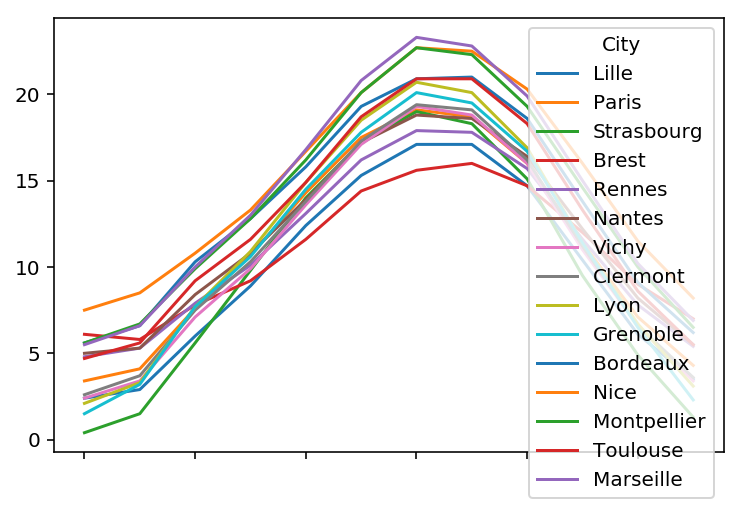

In [32]:
city_temp = french_cities.iloc[:,:12].transpose()
city_temp.plot()

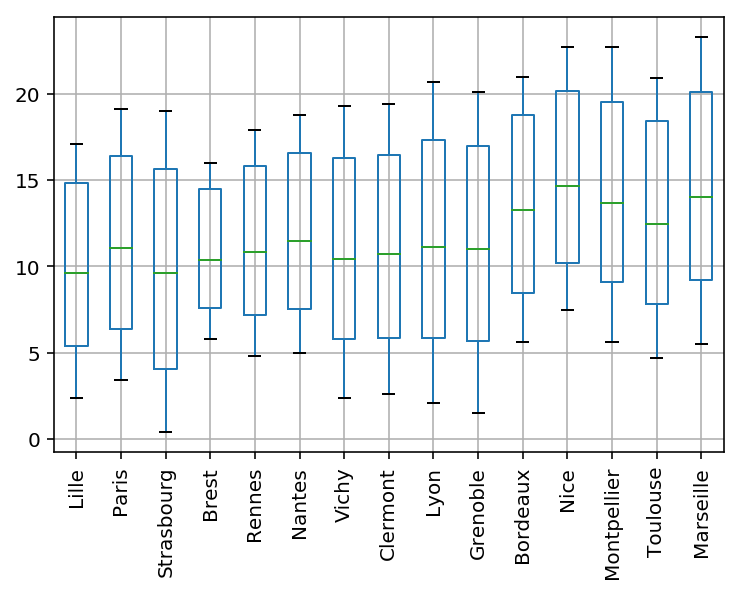

In [33]:
city_temp.boxplot(rot=90);

# Describing

In [34]:
french_cities['Région'].describe()

count     15
unique     4
top       SE
freq       7
Name: Région, dtype: object

In [35]:
french_cities['Région'].unique()

array(['NE', 'NO', 'SE', 'SO'], dtype=object)

In [36]:
french_cities['Région'].value_counts()

SE    7
NE    3
NO    3
SO    2
Name: Région, dtype: int64

In [37]:
# To save memory, we can convert it to a categorical column:
french_cities["Région"] = french_cities["Région"].astype("category")

In [38]:
french_cities.memory_usage()

Index     760
Jan       120
Feb       120
Mar       120
Apr       120
May       120
Jun       120
Jul       120
Aug       120
Sep       120
Oct       120
Nov       120
Dec       120
Lati      120
Long      120
Mean      120
Ampl      120
Région    207
dtype: int64

# Data Aggregation/summarization

## groupby

In [39]:
fc_grouped_region = french_cities.groupby("Région")
type(fc_grouped_region)

pandas.core.groupby.DataFrameGroupBy

In [40]:
for group_name, subdf in fc_grouped_region:
    print(group_name)
    print(subdf)
    print("")

NE
            Jan  Feb  Mar   Apr   May   Jun   Jul   Aug   Sep   Oct  Nov  Dec  \
City                                                                            
Lille       2.4  2.9  6.0   8.9  12.4  15.3  17.1  17.1  14.7  10.4  6.1  3.5   
Paris       3.4  4.1  7.6  10.7  14.3  17.5  19.1  18.7  16.0  11.4  7.1  4.3   
Strasbourg  0.4  1.5  5.6   9.8  14.0  17.2  19.0  18.3  15.1   9.5  4.9  1.3   

             Lati  Long   Mean  Ampl Région  
City                                         
Lille       50.38  3.04   9.73  14.7     NE  
Paris       48.52  2.20  11.18  15.7     NE  
Strasbourg  48.35  7.45   9.72  18.6     NE  

NO
        Jan  Feb  Mar   Apr   May   Jun   Jul   Aug   Sep   Oct  Nov  Dec  \
City                                                                        
Brest   6.1  5.8  7.8   9.2  11.6  14.4  15.6  16.0  14.7  12.0  9.0  7.0   
Rennes  4.8  5.3  7.9  10.1  13.1  16.2  17.9  17.8  15.7  11.6  7.8  5.4   
Nantes  5.0  5.3  8.4  10.8  13.9  17.2  18.8  18

## Transferring R data sets into Python

In [41]:
%load_ext rpy2.ipython

In [42]:
%%R
library('missMDA')
data(orange)
estim_ncpPCA(orange)

$ncp
[1] 2

$criterion
        0         1         2         3         4         5 
1.0388714 0.9279948 0.5976727 0.7855501 2.0250470 2.6741735 



- conversions of R to pandas objects will be done automatically

In [43]:
from rpy2.robjects import r, pandas2ri
pandas2ri.activate()
r.library('missMDA')
r.data('orange')
orange = r('orange')

In [44]:
orange

,Color.intensity,Odor.intensity,Attack.intensity,Sweet,Acid,Bitter,Pulp,Typicity
0,4.791667,5.291667,NaN,NaN,NaN,2.833333,NaN,5.208333
1,4.583333,6.041667,4.416667,5.458333,4.125000,3.541667,4.625000,4.458333
2,4.708333,5.333333,NaN,NaN,4.291667,3.166667,6.250000,5.166667
3,6.583333,6.000000,7.416667,4.166667,6.750000,NaN,1.416667,3.416667
4,NaN,6.166667,5.333333,4.083333,NaN,4.375000,3.416667,4.416667
5,6.333333,5.000000,5.375000,5.000000,5.500000,3.625000,4.208333,4.875000
6,4.291667,4.916667,5.291667,5.541667,5.250000,NaN,1.291667,4.333333
7,NaN,4.541667,4.833333,NaN,4.958333,2.916667,1.541667,3.958333
8,4.416667,NaN,5.166667,4.625000,5.041667,3.666667,1.541667,3.958333
9,4.541667,4.291667,NaN,5.791667,4.375000,NaN,NaN,5.000000


In [45]:
from rpy2.robjects.packages import importr
missMDA = importr("missMDA")

In [46]:
missMDA.estim_ncpPCA(orange)

R object with classes: ('list',) mapped to:
<ListVector - Python:0x11146b488 / R:0x7fa64c8e8988>
[IntVector, FloatVector]
  ncp: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x1148dc348 / R:0x7fa64beb37f8>
[2]
  criterion: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x1148dc108 / R:0x7fa64ca8bd50>
[1.038871, 0.927995, 0.597673, 0.785550, 2.025047, 2.674174]

In [47]:
res = missMDA.imputePCA(orange,ncp=2)

In [48]:
res[0]

4.791667,4.583333,4.708333,6.583333,...,3.958333,5.000000,5.250000,3.500000


In [49]:
import rpy2
pd_dataframe = pd.DataFrame(np.array(res[0]),columns=orange.columns)

In [50]:
pd_dataframe

,Color.intensity,Odor.intensity,Attack.intensity,Sweet,Acid,Bitter,Pulp,Typicity
0,4.791667,5.291667,4.077034,5.527352,4.177564,2.833333,5.711715,5.208333
1,4.583333,6.041667,4.416667,5.458333,4.125000,3.541667,4.625000,4.458333
2,4.708333,5.333333,4.158054,5.442936,4.291667,3.166667,6.250000,5.166667
3,6.583333,6.000000,7.416667,4.166667,6.750000,4.702509,1.416667,3.416667
4,6.271605,6.166667,5.333333,4.083333,5.455805,4.375000,3.416667,4.416667
5,6.333333,5.000000,5.375000,5.000000,5.500000,3.625000,4.208333,4.875000
6,4.291667,4.916667,5.291667,5.541667,5.250000,3.214232,1.291667,4.333333
7,4.460613,4.541667,4.833333,5.479128,4.958333,2.916667,1.541667,3.958333
8,4.416667,5.136550,5.166667,4.625000,5.041667,3.666667,1.541667,3.958333
9,4.541667,4.291667,4.176991,5.791667,4.375000,2.735255,4.026062,5.000000


In [51]:
r('library(missMDA)')
r('df <- imputePCA(orange,ncp=2) ')
r('res <- as.data.frame(df$completeObs)')
orange = r('res')
orange

,Color.intensity,Odor.intensity,Attack.intensity,Sweet,Acid,Bitter,Pulp,Typicity
0,4.791667,5.291667,4.077034,5.527352,4.177564,2.833333,5.711715,5.208333
1,4.583333,6.041667,4.416667,5.458333,4.125000,3.541667,4.625000,4.458333
2,4.708333,5.333333,4.158054,5.442936,4.291667,3.166667,6.250000,5.166667
3,6.583333,6.000000,7.416667,4.166667,6.750000,4.702509,1.416667,3.416667
4,6.271605,6.166667,5.333333,4.083333,5.455805,4.375000,3.416667,4.416667
5,6.333333,5.000000,5.375000,5.000000,5.500000,3.625000,4.208333,4.875000
6,4.291667,4.916667,5.291667,5.541667,5.250000,3.214232,1.291667,4.333333
7,4.460613,4.541667,4.833333,5.479128,4.958333,2.916667,1.541667,3.958333
8,4.416667,5.136550,5.166667,4.625000,5.041667,3.666667,1.541667,3.958333
9,4.541667,4.291667,4.176991,5.791667,4.375000,2.735255,4.026062,5.000000


# matplotlib
```bash
pip3 install adjusttext
```

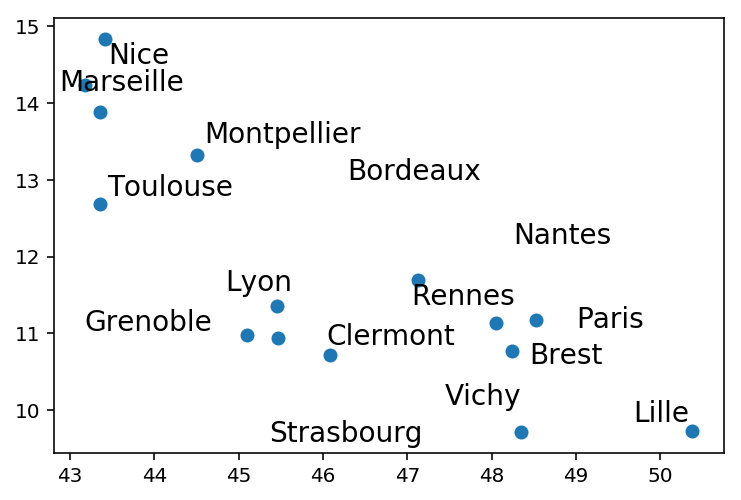

In [52]:
from adjustText import adjust_text

x, y = french_cities['Lati'],french_cities["Mean"]
labels = french_cities.index
plt.scatter(x, y)
texts = []
for x0, y0, s0 in zip(x,y,labels):
    texts.append(plt.text(x0, y0, s0, size=14))
adjust_text(texts, x, y);

In [53]:
french_cities.columns

Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec', 'Lati', 'Long', 'Mean', 'Ampl', 'Région'],
      dtype='object')

# Altair https://altair-viz.github.io/

In [54]:
import altair as alt
alt.renderers.enable('notebook')

Chart({
  data:                 site           variety  year     yield
  0    University Farm         Manchuria  1931  27.00000
  1             Waseca         Manchuria  1931  48.86667
  2             Morris         Manchuria  1931  27.43334
  3          Crookston         Manchuria  1931  39.93333
  4       Grand Rapids         Manchuria  1931  32.96667
  5             Duluth         Manchuria  1931  28.96667
  6    University Farm           Glabron  1931  43.06666
  7             Waseca           Glabron  1931  55.20000
  8             Morris           Glabron  1931  28.76667
  9          Crookston           Glabron  1931  38.13333
  ..               ...               ...   ...       ...
  110           Morris           No. 475  1932  44.23333
  111        Crookston           No. 475  1932  32.13333
  112     Grand Rapids           No. 475  1932  15.23333
  113           Duluth           No. 475  1932  27.36667
  114  University Farm  Wisconsin No. 38  1932  38.00000
  115           W

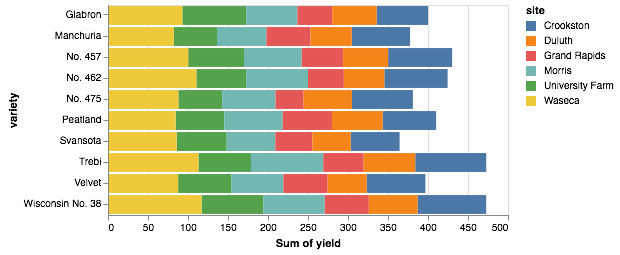

In [56]:
from vega_datasets import data

barley = data.barley()

alt.Chart(barley).mark_bar().encode(
    x='sum(yield)',
    y='variety',
    color='site'
)